<a href="https://colab.research.google.com/github/favourphilic/Deep-Learning/blob/main/cifar10_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image classification Project.

* Torchvision provides many built-in datasets in the torchvision.datasets module.
* All datasets are subclasses of torch.utils.data.Dataset i.e, they have __getitem__ and __len__ methods implemented.
* Therefore, they can all be passed to a torch.utils.data.DataLoader which can load multiple or batch samples in parallel using torch.multiprocessing workers.
* Interestingly, all the datasets have similar API. They possess two common argument, which are transform and target-transform to transform the input and target respectively.
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------

## What is CIFAR Data?
* The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a collection of images that are commonly used to train machine learning and computer vision algorithms. It is one of the most widely used datasets for machine learning research.

## Lets get to work.

## 1.0 Importing the required libraries.

In [ ]:
import numpy as np
import torch  
from torch import nn
import torchvision 
from torchsummary import summary
from torchvision import datasets
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor 
import matplotlib.pyplot as plt

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
## CIFAR-10 Pre-built dataset.

* In this project, I will be using the pre-biult cifar-10 dataset.
* Its one of the common torchvision datasets, which is commonly used for image classification problem.
* Just like any torchvision dataset, it requires five parameters; root, train, transform, target-tranform and download.
* once the class object has been created, it rerurns a tuple of image and target, where the target is the index of the target class.
* The cifar10 datasets consists of 60,000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.


## 2.0a Downloading the prebuilt dataset using the torchvision.datasets module

In [ ]:
# We will comeback to this later. But, all I will doing in the  next wo cells
# is to obatine the weight and transformation available in a pretrained model.
# then, I will apply this transfomation on my dataset.
# Get a set of pretrained model weights
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = best available weights from pretraining on ImageNet
weights

EfficientNet_B0_Weights.IMAGENET1K_V1

In [ ]:
auto_transform = weights.transforms()
auto_transform
# Hence, this transformation will be passed as argument to the transform parameter of datasets

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [ ]:
# code here will download the train dataset, since the train parameter is set to True
training_data = datasets.CIFAR10(root="data",train=True,download=True,transform=auto_transform)

# while this would download the test data. This explains why the train parameter was set to False
test_data = datasets.CIFAR10(root="data",train=False,download=True,transform=auto_transform )

# the downloaded data will be loacted in your working directory. This may take few seconds/minutes.

100%|██████████| 170498071/170498071 [00:13<00:00, 12671003.82it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [ ]:
# That was quick. 
# Its always a good practice to examine your dataset as your go on with the project.
# So, let's take a look at the first image in our training dataset.
# recall, that the first training data consist of both the image and its label (a tuple)
# We can index Datasets manually like a list: training_data[index]

img, label = training_data[0]
print(img.shape)
print(label)

torch.Size([3, 224, 224])
6


* The first image in the cifar10 is colored image( as seen by the 3 channels) of 32 by 32 size.

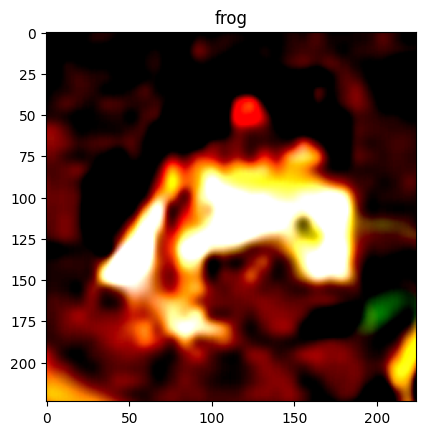

In [ ]:
# I will visualize the image using matplotlib module
plt.imshow( img.permute(1,2,0))
plt.title(training_data.classes[label])
plt.show()

* Once the data as been downloaded and registered as a dataset class.
* There are few attribute that can be applied on the dataset to get more information.

In [ ]:
# 1. To get the class labels, use .classes
training_data.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
class_names = training_data.classes

In [ ]:
# As seen above we have 10 different classes to which any of the images can belong to.
# 2.0 We can also obtain the classes and their repective indexes using, .class_to_index
training_data.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [ ]:
# 3.0 To obtain the length of both the data and targets in the train and test dataset, use the len method.
len(training_data.data), len(training_data.targets), len(test_data.data), len(test_data.targets)

(50000, 50000, 10000, 10000)

* From the total of 60000 data, we have 50000 training and 10000 test data.

## Visualizing some of the images.

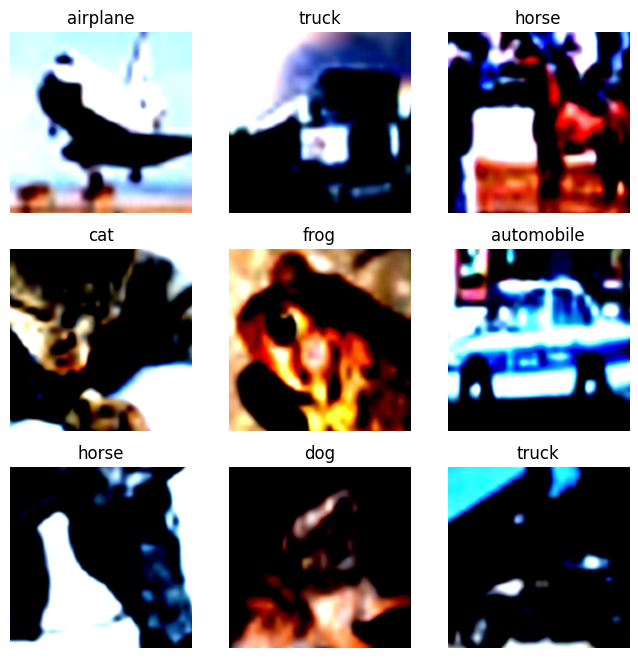

In [ ]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(training_data.classes[label])
    plt.axis("off")
    plt.imshow(img.permute(1,2,0))
plt.show()

## 2.0b The DataLoader
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------

* After registering our data into the dataset class. It allows us to retrieve the datatset features(image) and label. But, only one at a time. This might not be effecient for a deep learning model which requires samples (in mini-batches) to be passed into the model, while also reshuffling it during each epoch to avoid overfitting and also improve the accuarcy of the model learning the right pattern form the data.

* DataLoader will do this for us, by using a simple API.
* import it from torch.utlis.data
* Instantiate the class.
* It takes few arguments such as; the dataset, shuffle, and reuired batch-size

* Doing this create an  iterable over our dataset, and supports automatic batching, sampling, shuffling and multiprocess data loading.
* Here our batch size is 64,( i.e. This means that each element in the dataloader iterable will return a batch of 64 features and labels. 32 is also a commonly used batch-size)

In [ ]:
from torch.utils.data import DataLoader
batch_size = 64
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

## Let's iterate over the dataloader

* Once your data is in a DataLoader, you can  iterate through the dataset as needed.
* Each iteration will returns a batch(64 each of the features and labels  in our case) of train_features and train_labels.
* setting shuffle=True, allows data to be shuffled (for finer-grained control over the data loading order)

Feature batch shape: torch.Size([64, 3, 224, 224])
Labels batch shape: torch.Size([64])


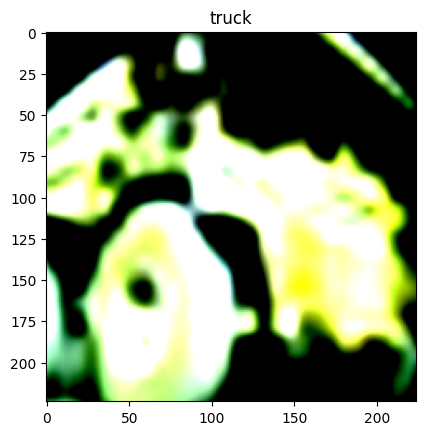

In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))

print(f"Feature batch shape: {train_features.size()}")

print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].permute(1,2,0)
label = train_labels[0]
plt.imshow(img)
plt.title(class_names[label])
plt.show()


In [ ]:
print(train_dataloader.dataset)
print(test_dataloader.dataset)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: data
    Split: Train
    StandardTransform
Transform: ImageClassification(
               crop_size=[224]
               resize_size=[256]
               mean=[0.485, 0.456, 0.406]
               std=[0.229, 0.224, 0.225]
               interpolation=InterpolationMode.BICUBIC
           )
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ImageClassification(
               crop_size=[224]
               resize_size=[256]
               mean=[0.485, 0.456, 0.406]
               std=[0.229, 0.224, 0.225]
               interpolation=InterpolationMode.BICUBIC
           )


## Introducing device agnostic
*  This will ensure that we don't run into error irrespective of the device we are working on.

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
## 3.0 Using pretrained model

* torchvision.models subpackage contains a number of  models for addressing different tasks, including but not limited to: image classification, object detection, instance segmentation, video classification e.t.c.
* This gives us the advantage of use a model, which has been success in a similar task without a need to explicitly define ours from scratch.

   * TorchVision offers pre-trained weights for every provided architecture.
   * We obatined the weight of efficientNet architecture in the first cell of this noteboke. and subsequently we got the transformation from the architecture. Which we used in transforming our dataset above.

* NB 1. pretrained parameter is now deprecated, using it will emit warnings and will be removed on v0.15
2. weights may change across versions of a particular architecture. However, the best available weight is laebl DEFAULT.

In [ ]:
model = torchvision.models.efficientnet_b0(weights=weights)


Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-3dd342df.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-3dd342df.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 131MB/s] 


In [ ]:
model.to(device)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

* However, some little adjust need to be done on the model to suit our problem.
* Architecture such as Effiecient net, which I will be using for this task as been trained on the Imagenet dataset( which conatins about 1000 different classes).
* Since our task is to classify any of the images into any of the 10 different classes, we will adjust the pretrained model architecture from 1000 to 10.

In [ ]:
# The architecture has both the features and classifier layer
# We are going to Freeze all base layers in the "features" 
for param in model.features.parameters():
    param.requires_grad = False

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
output_shape = len(class_names)#length of class_names (one output unit for each class)

# Recreate the classifier layer and seed it to the target device
model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True), 
    torch.nn.Linear(in_features=1280, 
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)

In [ ]:
summary(model, input_size = (3, 224, 256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 128]             864
       BatchNorm2d-2         [-1, 32, 112, 128]              64
              SiLU-3         [-1, 32, 112, 128]               0
            Conv2d-4         [-1, 32, 112, 128]             288
       BatchNorm2d-5         [-1, 32, 112, 128]              64
              SiLU-6         [-1, 32, 112, 128]               0
 AdaptiveAvgPool2d-7             [-1, 32, 1, 1]               0
            Conv2d-8              [-1, 8, 1, 1]             264
              SiLU-9              [-1, 8, 1, 1]               0
           Conv2d-10             [-1, 32, 1, 1]             288
          Sigmoid-11             [-1, 32, 1, 1]               0
SqueezeExcitation-12         [-1, 32, 112, 128]               0
           Conv2d-13         [-1, 16, 112, 128]             512
      BatchNorm2d-14         [-1, 16, 1

* The number of trainable parameters has decreased.
* There are just 10 output features as against the 1000.

In [ ]:
!pip install -q torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 33.1 MB/s eta 0:00:00


In [ ]:
from torchmetrics import Accuracy

In [ ]:
accuracy_fn = Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

In [ ]:
from timeit import default_timer as timer 
def print_train_time(start, end, device= None):
   
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [ ]:
# define a trainstep function

def train_step(model,data_loader,loss_fn,optimizer,accuracy_fn,device = device):
    train_loss, train_acc = 0, 0

    model.train()
    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_pred.argmax(dim=1), y)
         # Go from logits -> pred labels
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")



In [ ]:
# Define test step function
def test_step(model,data_loader,loss_fn,accuracy_fn,device = device):
    test_loss, test_acc = 0, 0

    model.eval() 
    with torch.inference_mode(): 
        for X, y in data_loader:
          
            X, y = X.to(device), y.to(device)
            test_pred = model(X)
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(test_pred.argmax(dim=1), y )
        
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [ ]:
len(train_dataloader.dataset)

50000

In [ ]:
torch.manual_seed(42)

from tqdm.auto import tqdm

# To  Measure time
from timeit import default_timer as timer
start_time = timer()

epochs = 3
for epoch in tqdm(range(epochs)):

    print(f"Epoch: {epoch}\n---------")

    train_step(data_loader=train_dataloader, model=model, loss_fn=loss_fn,optimizer=optimizer, accuracy_fn=accuracy_fn)
    
    test_step(data_loader=test_dataloader,model=model,loss_fn=loss_fn,accuracy_fn=accuracy_fn)

end_time = timer()



total_train_time_model_1 = print_train_time(start=start_time,end=end_time,device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.85413 | Train accuracy: 0.73%
Test loss: 0.61065 | Test accuracy: 0.80%

Epoch: 1
---------
Train loss: 0.68667 | Train accuracy: 0.77%
Test loss: 0.57095 | Test accuracy: 0.81%

Epoch: 2
---------
Train loss: 0.66205 | Train accuracy: 0.78%
Test loss: 0.56016 | Test accuracy: 0.81%

Train time on cuda: 789.995 seconds


* wow, that took 789 seconds. Thanks to GPU, it would have taken forever on the cpu.
* The loss reduces per epoch. Also the accuracy increase per epoch.

--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
## Let's Make Prediction.
* Here, we are going to define a function to make prediction on a test data.
* The prediction will return the model name, loss and accuracy.

In [ ]:
torch.manual_seed(42)
def eval_model(model,data_loader,loss_fn,accuracy_fn):
    
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)

            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_pred.argmax(dim=1), y )
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

In [ ]:
model_result = eval_model(model=model,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)
model_result

{'model_name': 'EfficientNet',
 'model_loss': 0.5579627752304077,
 'model_acc': tensor(0.8077, device='cuda:0')}

## Making Function to Make random Prediction.

In [ ]:
def make_predictions(model, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device
            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)
            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
           # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())
            
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [ ]:
# Select 9 random data points from the test dataset

import random
random.seed(42)
test_samples= []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)


In [ ]:
test_samples[0].shape

torch.Size([3, 224, 224])

In [ ]:
# Let's take a look at the shape and label of the first sample in the list.
print(f"Test sample img shape: {test_samples[0].shape} \n Test label shape : {test_labels[0]} ({class_names[test_labels[0]]}) ")


Test sample img shape: torch.Size([3, 224, 224]) 
 Test label shape : 9 (truck) 


In [ ]:
pred_probs= make_predictions(model=model, data=test_samples) #make prediction on the test_samples
pred_probs[:2]  # view the first two

tensor([[3.8882e-03, 2.2047e-04, 1.4277e-06, 8.9368e-06, 6.6570e-06, 3.0106e-06,
         6.0919e-07, 1.8589e-05, 1.4011e-04, 9.9571e-01],
        [5.2073e-04, 7.8210e-06, 4.8783e-01, 4.3570e-02, 2.0697e-01, 7.0978e-03,
         4.9358e-04, 2.5329e-01, 1.8315e-04, 4.2469e-05]])

* Turn the prediction probabilities into prediction labels by taking the argmax()

In [ ]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([9, 2, 1, 3, 7, 6, 7, 0, 9])

* Compare the predictions to target class

In [ ]:
test_labels, pred_classes

([9, 2, 1, 3, 7, 3, 7, 0, 9], tensor([9, 2, 1, 3, 7, 6, 7, 0, 9]))

### Nice!

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
## Visualize Visualize Visualize 

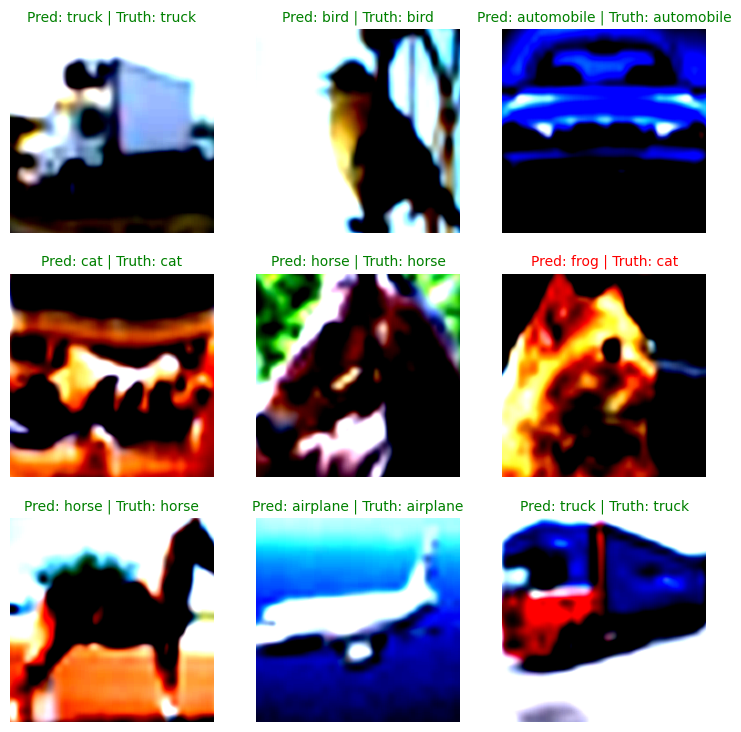

In [ ]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.permute(1,2,0))

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]] 

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  
  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

* Well, our model is doing quite well. 
* Ofcourse, there are need for improvement.